# コイン投げ

In [12]:
using Random
using Plots
using Distributions
using StatsPlots
Random.seed!(1234);

## データ生成

In [13]:
d = Bernoulli(0.5)
data = rand(d, 100)
data[1:5]

5-element Vector{Bool}:
 1
 0
 1
 0
 1

## 推論

┌ Info: Saved animation to 
│   fn = /Users/akifumiabe/Julia/BayesMLBook/tmp.gif
└ @ Plots /Users/akifumiabe/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/akifumiabe/Julia/BayesMLBook/tmp.gif")
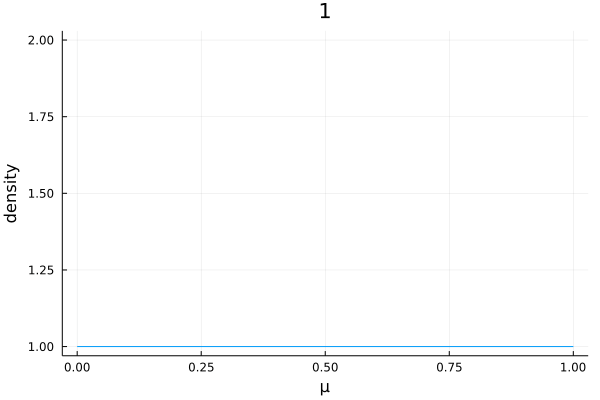

In [29]:
prior_dist = Beta(1, 1)

anim = @gif for (i, N) in enumerate(0:100)
    a_hat = sum(data[1:i-1]) + prior_dist.α
    b_hat = N - sum(data[1:i-1]) + prior_dist.β
    posterior = Beta(a_hat, b_hat)
    plot(posterior, xlab="μ", ylab="density", title="$i", label=:none)
end

# コイン投げ（Turing.ji）

In [30]:
using Turing
using MCMCChains

## モデル

In [31]:
@model function coinflip(y)
    p ~ Beta(1, 1)
    N = length(y)
    for n in 1:N
        y[n] ~ Bernoulli(p)
    end
end

DynamicPPL.ModelGen{var"###generator#802", (:y,), (), Tuple{}}(var"##generator#802", NamedTuple())

## 推論

In [39]:
iter = 1000
ϵ = 0.05 # \epsilon + <TAB>
τ = 10 # \tau + <TAB>
chain = sample(coinflip(data), HMC(ϵ, τ), iter, progress=false)

Object of type Chains, with data of type 1000×10×1 Array{Float64, 3}

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1
Samples per chain = 1000
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, n_steps, nom_step_size, step_size
parameters        = p

2-element Vector{ChainDataFrame}

Summary Statistics
  parameters    mean     std  naive_se    mcse        ess   r_hat
  ──────────  ──────  ──────  ────────  ──────  ─────────  ──────
           p  0.4512  0.0526    0.0017  0.0004  1305.7799  0.9990

Quantiles
  parameters    2.5%   25.0%   50.0%   75.0%   97.5%
  ──────────  ──────  ──────  ──────  ──────  ──────
           p  0.3507  0.4174  0.4511  0.4837  0.5521


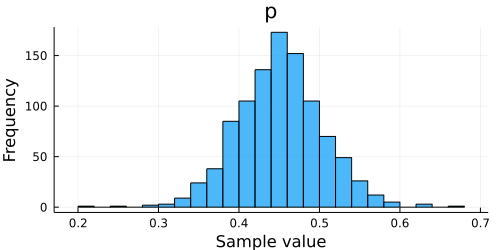

In [42]:
p_summary = chain[:p]
plot(p_summary, seriestype=:histogram)